## Telecom Case Study

### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

### Main Goals:
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.
In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Understanding Customer Behaviour During Churn
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

In [31]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


## Data cleaning and preperation

In [32]:
df= pd.read_csv("telecom_churn_data.csv")

In [33]:
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [34]:
df.shape

(99999, 226)

In [35]:
round(100 *(df.isnull().sum()/len(df)).sort_values(ascending=False))

arpu_3g_6            75.0
night_pck_user_6     75.0
total_rech_data_6    75.0
arpu_2g_6            75.0
max_rech_data_6      75.0
                     ... 
max_rech_amt_7        0.0
max_rech_amt_6        0.0
total_rech_amt_9      0.0
total_rech_amt_8      0.0
sep_vbc_3g            0.0
Length: 226, dtype: float64

#### Dropping  columns with missing values more than 60 %

In [36]:
missing = 100 *(df.isnull().sum()/len(df))
cols_tdrop = missing[missing > 60].index 
cols_tdrop

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [37]:
df = df.drop(columns=cols_tdrop)
df.shape

(99999, 186)

Dropping date columns as it wont add more value to our analysis

In [38]:
date_cols_drop = [col for col in df.columns if 'date' in col]
df= df.drop(columns=date_cols_drop)

In [39]:
df.shape

(99999, 178)

Dropping columns having a single unique value as it wont add any value for our analysis

In [40]:
df_unique_col = df.loc[:,df.nunique()==1]
cols_todrop= df_unique_col.columns
cols_todrop

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7',
       'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9'],
      dtype='object')

In [41]:
df.drop(columns= cols_todrop,inplace=True)
df.shape

(99999, 166)

Dropping mobile number column

In [42]:
df.drop(columns=["mobile_number"],inplace=True)

In [43]:
df.shape

(99999, 165)

Removing the rows with missing values 

In [44]:
df= df.dropna()

In [45]:
df.shape

(88327, 165)

In [46]:
round(100 *(df.isnull().sum()/len(df)).sort_values(ascending=False))

arpu_6            0.0
total_ic_mou_6    0.0
total_ic_mou_8    0.0
total_ic_mou_9    0.0
spl_ic_mou_6      0.0
                 ... 
isd_og_mou_6      0.0
isd_og_mou_7      0.0
isd_og_mou_8      0.0
isd_og_mou_9      0.0
sep_vbc_3g        0.0
Length: 165, dtype: float64

#### Filtering high value customers

In [47]:
## getting average recharge amount in June and July
df["avg_recharge_amt"] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
threshold= df["avg_recharge_amt"].quantile(0.7)
threshold

383.0

In [48]:
## filtering high value customers whose avg_recharge amount is greater than threshold value
high_val_cust = df[df["avg_recharge_amt"] > threshold]
high_val_cust.shape

(26464, 166)

#### Tag the churners based on the below attributes

In [49]:
high_val_cust['churn'] = np.where((high_val_cust['total_ic_mou_9'] == 0) &
                                  (high_val_cust['total_og_mou_9'] == 0) &
                                  (high_val_cust['vol_2g_mb_9'] == 0) &
                                  (high_val_cust['vol_3g_mb_9'] == 0),1,0)

#### Remove all the attributes corresponding to the churn phase

In [50]:
cols_todrop = [col for col in high_val_cust.columns if col.endswith('_9') ]

In [51]:
high_val_cust = high_val_cust.drop(columns=cols_todrop)

In [52]:
high_val_cust.shape

(26464, 127)

#### Deriving new features

In [53]:
## Change in recharge amount (btw 8th and 6th month)
df1 = high_val_cust


In [54]:
df1["change_rech_mon_6_8"] = df1['total_rech_amt_8'] - df1['total_rech_amt_6']
df1["change_rech_mon_6_8"].head()

8    -317
16   -410
17   -786
21    118
24     50
Name: change_rech_mon_6_8, dtype: int64

In [55]:
 ## Change in data usage (btw 8th and 6th month)
df1["change_data_usg_6_8"]   = (df1['vol_2g_mb_8']+df1['vol_3g_mb_8']) - (df1['vol_2g_mb_6']+df1['vol_3g_mb_6'])
df1["change_data_usg_6_8"].head()

8     11.97
16     0.00
17     0.00
21     0.00
24     0.00
Name: change_data_usg_6_8, dtype: float64

## Data Visualization

<Axes: xlabel='churn', ylabel='count'>

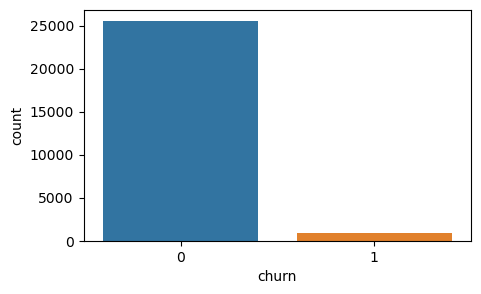

In [56]:
plt.figure(figsize=[5,3])
sns.countplot(data= df1,x='churn')

In [57]:
df1['churn'].value_counts()

churn
0    25570
1      894
Name: count, dtype: int64

We can clearly see a data imbalance here. So we need to handle this using appropriate techinque.

<Axes: xlabel='arpu_8', ylabel='Density'>

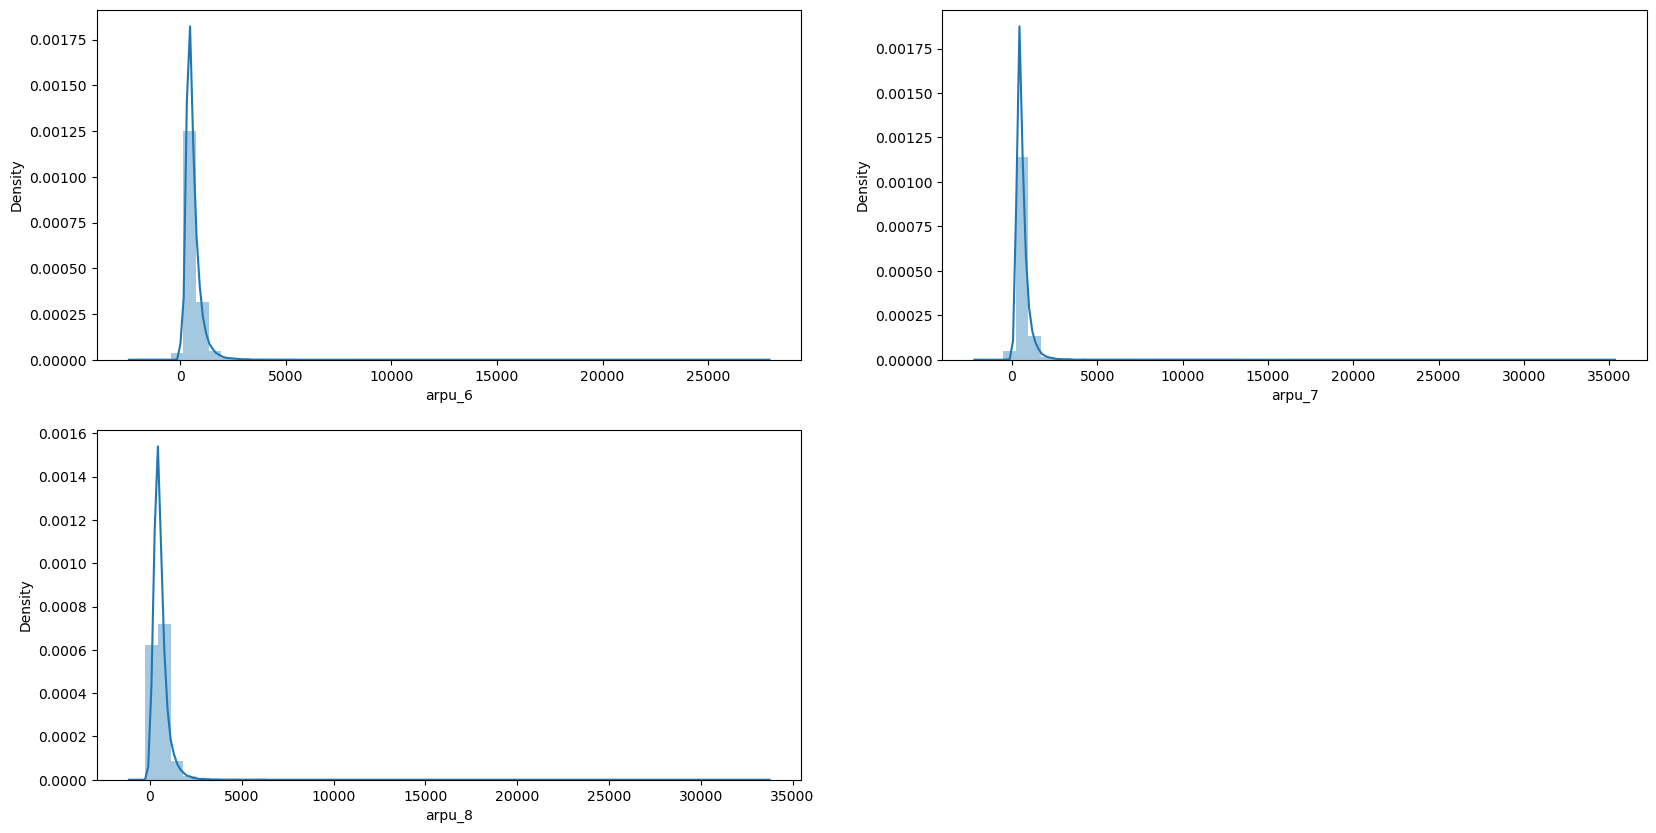

In [58]:
plt.figure(figsize=[20,10])
plt.subplot(2,2,1)
sns.distplot(df1.arpu_6)
plt.subplot(2,2,2)
sns.distplot(df1.arpu_7)
plt.subplot(2,2,3)
sns.distplot(df1.arpu_8)

In [59]:
df1.churn= df1.churn.astype('category')

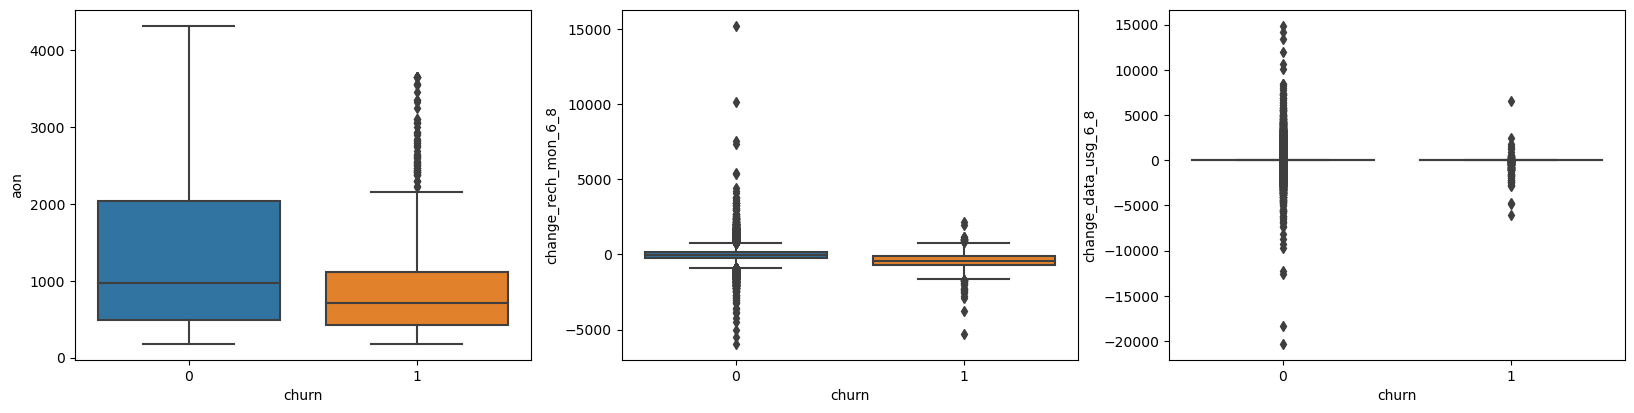

In [60]:
plt.figure(figsize=[20,10])
plt.subplot(2,3,1)
sns.boxplot(data=df1,x='churn',y='aon')
plt.subplot(2,3,2)
sns.boxplot(data=df1,x='churn',y='change_rech_mon_6_8')
plt.subplot(2,3,3)
sns.boxplot(data=df1,x='churn',y="change_data_usg_6_8")
plt.show()


Assigning X and y values for target and response variables

In [61]:
X = df1.drop('churn',axis=1)

In [62]:
y= df1.churn


## Test train split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

## Feature Scaling and Dimensionality Reduction (PCA)

#### Reduce the number of components using PCA

In [65]:
numerical_cols = df1.select_dtypes(include=['int64', 'float64','int32']).columns
numerical_cols.to_list()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

#### Scaling the data

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

#### PCA

In [67]:
from sklearn.decomposition import PCA

In [68]:
pca= PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [69]:
pca.explained_variance_ratio_

array([1.00027835e-01, 8.95637919e-02, 5.68471875e-02, 4.74676560e-02,
       3.88165116e-02, 3.70242255e-02, 2.90566534e-02, 2.78195031e-02,
       2.73583078e-02, 2.60357423e-02, 2.40609028e-02, 2.28517316e-02,
       2.16701614e-02, 2.07112965e-02, 2.03419259e-02, 1.91203140e-02,
       1.62287530e-02, 1.45032128e-02, 1.39042723e-02, 1.37943369e-02,
       1.32888225e-02, 1.30640967e-02, 1.22467317e-02, 1.16770797e-02,
       1.11405107e-02, 1.03211742e-02, 9.96963510e-03, 9.73161634e-03,
       9.30528522e-03, 9.15264438e-03, 8.10259341e-03, 7.66585953e-03,
       7.32577839e-03, 7.22241199e-03, 7.06908655e-03, 6.62387730e-03,
       6.38330460e-03, 6.32870619e-03, 6.21032958e-03, 5.99086784e-03,
       5.89693033e-03, 5.63154341e-03, 5.44097912e-03, 5.43093866e-03,
       5.17558522e-03, 5.07669897e-03, 4.97042397e-03, 4.75806828e-03,
       4.26884512e-03, 4.01184070e-03, 3.90278602e-03, 3.85903251e-03,
       3.69659248e-03, 3.63869568e-03, 3.56308184e-03, 3.41368822e-03,
      

In [70]:
cum_var = np.cumsum(pca.explained_variance_ratio_)

Plotting the scree plot

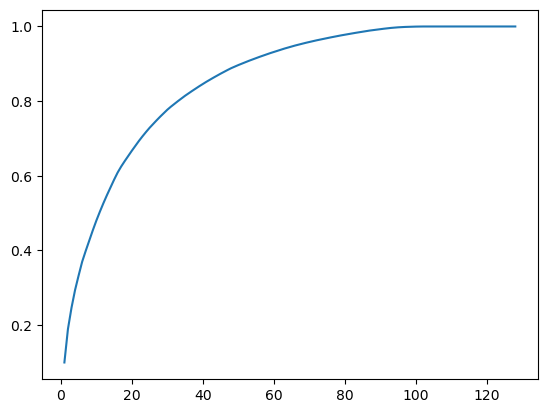

In [71]:
plt.plot(range(1,len(cum_var)+1),cum_var)

In [72]:
from sklearn.decomposition import IncrementalPCA

In [73]:
pca2= IncrementalPCA(n_components= 60)
df_train_pca =pca2.fit_transform(X_train)
df_test_pca = pca2.transform(X_test)

In [74]:
pca2.components_

array([[ 0.15609505,  0.16658405,  0.16456609, ...,  0.17616426,
         0.03225102,  0.01509982],
       [ 0.10971758,  0.13344862,  0.11603519, ...,  0.13276326,
         0.02466695,  0.00845379],
       [ 0.12454214,  0.14758127,  0.14281796, ...,  0.15248487,
         0.03348907,  0.02408009],
       ...,
       [ 0.02015582, -0.02539115, -0.03260792, ...,  0.01555255,
        -0.09141656,  0.04646099],
       [-0.05021869,  0.02826679,  0.07849465, ..., -0.043069  ,
         0.1602588 , -0.08103729],
       [-0.00301454, -0.00398163,  0.02138823, ..., -0.00593018,
         0.0436505 , -0.03370514]])

In [75]:
print(df_train_pca.shape)
print(df_test_pca.shape)

(18524, 60)
(7940, 60)


## Logistic Regression using PCA

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logreg_pca = LogisticRegression(random_state=42)
logreg_pca.fit(df_train_pca,y_train)

LogisticRegression(random_state=42)

In [78]:
predict_pca=logreg_pca.predict_proba(df_test_pca)

In [79]:
predict_pca[:,1]

array([0.00570873, 0.00137598, 0.00931389, ..., 0.00347841, 0.01561046,
       0.06938186])

In [80]:
from sklearn.metrics import classification_report,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,confusion_matrix,f1_score

In [81]:
print(roc_auc_score(y_test,predict_pca[:,1]))

0.8927659657296937


## Handling class imbalance

In [82]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=42,k_neighbors=5)
X_resampled,y_resampled = smt.fit_resample(X_train,y_train)

In [83]:
from collections import Counter
Counter(y_resampled).items()

dict_items([(0, 17884), (1, 17884)])

#### Fitting a Logistic regression on this resampled data

In [84]:
logreg2=LogisticRegression(random_state=42)
logreg2.fit(X_resampled,y_resampled)

LogisticRegression(random_state=42)

In [85]:
y_pred_smt = logreg2.predict(X_test)

In [86]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.8406801007556675
F1 score:  0.25103611604499704
Recall:  0.8346456692913385
Precision:  0.14773519163763066

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      7686
           1       0.15      0.83      0.25       254

    accuracy                           0.84      7940
   macro avg       0.57      0.84      0.58      7940
weighted avg       0.97      0.84      0.89      7940


 confussion matrix:
 [[6463 1223]
 [  42  212]]


## Random forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm1= RandomForestClassifier()
rm1.fit(X_resampled,y_resampled)


In [88]:
y_pred_rm=rm1.predict(X_test)

In [89]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rm))
print ('F1 score: ', f1_score(y_test, y_pred_rm))
print ('Recall: ', recall_score(y_test, y_pred_rm))
print ('Precision: ', precision_score(y_test, y_pred_rm))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rm))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rm))

Accuracy:  0.9590680100755667
F1 score:  0.4799999999999999
Recall:  0.5905511811023622
Precision:  0.40431266846361186

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      7686
           1       0.40      0.59      0.48       254

    accuracy                           0.96      7940
   macro avg       0.70      0.78      0.73      7940
weighted avg       0.97      0.96      0.96      7940


 confussion matrix:
 [[7465  221]
 [ 104  150]]


## Decision tree model using Hyper parameter tuning

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [91]:
df= DecisionTreeClassifier()
params={
    'max_depth': [5, 10, 30,40,60],
    'min_samples_leaf': [50, 100,1000,10000],
    'criterion': ["gini", "entropy"]
}

In [92]:
grdsrchv= GridSearchCV(estimator=df,n_jobs=-1,verbose=1,cv=5,param_grid=params,scoring="accuracy")

In [93]:
grdsrchv.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 30, 40, 60],
                         'min_samples_leaf': [50, 100, 1000, 10000]},
             scoring='accuracy', verbose=1)

In [94]:
best_est=grdsrchv.best_estimator_

In [95]:
y_pred_df = best_est.predict(X_test)

In [96]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_df))
print ('F1 score: ', f1_score(y_test, y_pred_df))
print ('Recall: ', recall_score(y_test, y_pred_df))
print ('Precision: ', precision_score(y_test, y_pred_df))
print ('\n clasification report:\n', classification_report(y_test,y_pred_df))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_df))

Accuracy:  0.9341309823677582
F1 score:  0.44420828905419757
Recall:  0.8228346456692913
Precision:  0.3042212518195051

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      7686
           1       0.30      0.82      0.44       254

    accuracy                           0.93      7940
   macro avg       0.65      0.88      0.70      7940
weighted avg       0.97      0.93      0.95      7940


 confussion matrix:
 [[7208  478]
 [  45  209]]


In [100]:
feature_importances = best_est.feature_importances_

In [106]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.head(20)


,Feature,Importance
11,roam_ic_mou_8,0.693658
80,total_ic_mou_8,0.084281
14,roam_og_mou_8,0.026383
98,max_rech_amt_8,0.022059
40,std_og_mou_7,0.021860
101,last_day_rch_amt_8,0.015544
91,total_rech_num_7,0.008763
110,monthly_2g_8,0.008305
53,total_og_mou_8,0.005868
9,roam_ic_mou_6,0.005649


###  Main indicator of churn
From above it is clear that the factors affecting the churn are roam_ic_mou_8,total_ic_mou_8,roam_og_mou_8,max_rech_amt_8.

Steps to help reduce churn

Give special; discounts to customers according to their usage

Provide additional internet services on recharge.

Speak to customers to fulfil their desires.

Lower tariffs on data usage,a better 2G area coverage where 3G is not available.

Expansion of 3G network where 3G is currently not available.